In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_path = '/content/drive/MyDrive/dano/img/'
font_path = '/content/drive/MyDrive/dano/fonts/'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/dano/cb_ind_merged.csv')
data_hh = pd.read_csv('/content/drive/MyDrive/dano/cb_hh_all.csv', encoding='cp1251')

<ipython-input-4-8d22e250063b>:1: DtypeWarning: Columns (103,225,254,264,275,293,296,369,409,533,547,579,615,621,674,684,694,734,744,754,764,774,846,850,887,890,893,899,976,978,980,988,996,1069,1076,1091,1093,1100,1116,1139,1142,1173,1175,1177,1237,1240,1243,1305,1317,1329,1400,1402,1407,1410,1429,1656,1658,1660,1753,1755) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/dano/cb_ind_merged.csv')
<ipython-input-4-8d22e250063b>:2: DtypeWarning: Columns (24,26,30,32,35,37,41,43,47,48,50,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,78,79,80,81,82,83,84,85,86,87,89,90,91,92,93,94,95,96,97,99,101,102,103,104,105,106,107,108,109,110,111,112,114,115,116,117,118,119,120,121,122,123,124,126,128,129,130,131,132,133,134,135,136,137,138,139,141,143,144,145,146,147,148,149,150,151,152,153,154,155,157,159,160,161,162,163,164,165,166,167,168,169,170,171,172,174,176,177,178,179,180,181,182,183,184,185,186,187,188

In [ ]:
df = data.copy()
df_hh = data_hh.copy()

In [ ]:
df["age"] = df["id_w"] - df["i_h5"]

In [ ]:
df33 = df[(df["id_w"] == 2018) & (df["age"] >= 23) & (df["age"] <= 172)].dropna(subset=['t7', 't11', 't17', 't10', 'm19'])
df22 = df[(df["id_w"] == 2022) & (df["age"] >= 23) & (df["age"] <= 172)].dropna(subset=['t7', 't11', 't17', 't33', 'm19'])

<Axes: >

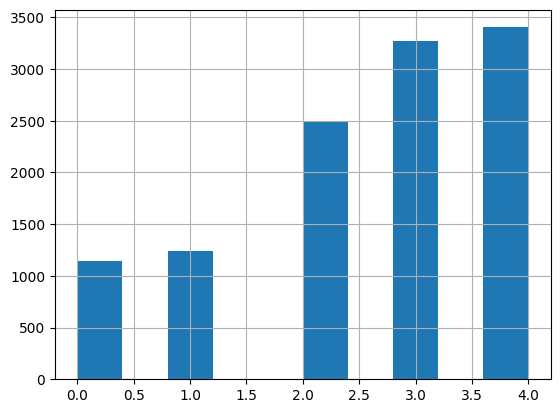

In [ ]:
import math


def theory_score(row):
    score = 0

    score += row["t7"] == 1.0
    score += row["t11"] == 1.0
    score += row["t17"] == 3.0
    score += row["t10"] == 2.0



    # # Tasks
    # # score += row["t7"] == 1.0
    # # score += row["t8"] == 1.0
    # score += row["t17"] == 3.0
    # score += row["t10"] == 2.0
    # # score += row["t11"] == 1.0
    # #score += row["t18"] == 1.0

    # score += (row["t2_4"] == 4.0) and math.isnan(row["t2_1"]) and math.isnan(row["t2_2"]) and math.isnan(row["t2_3"]) and math.isnan(row["t2_5"])
    # score += row["t3"] == 1.0
    # score += row["t4"] == 2.0
    # #score += row["t20"] == 3.0
    # #score += row["t22"] == 3.0



    return score


df33["theory_score"] = df33.apply(theory_score, axis=1)
df33["theory_score"].hist()

<Axes: >

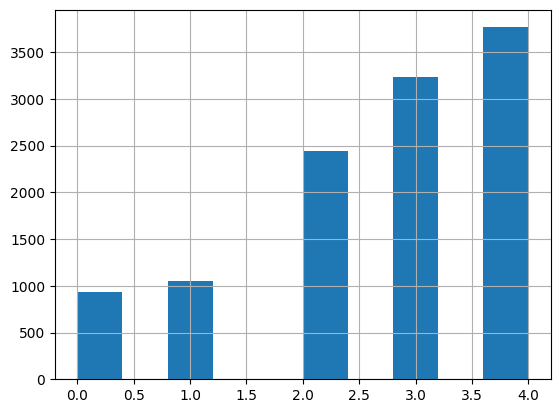

In [ ]:
import math


def theory_score(row):
    score = 0

    score += row["t7"] == 1.0
    score += row["t11"] == 1.0
    score += row["t17"] == 3.0
    score += row["t33"] == 2.0


    # # Tasks
    # # score += row["t7"] == 1.0
    # # score += row["t8"] == 1.0
    # score += row["t17"] == 3.0
    # score += row["t33"] == 2.0
    # # score += row["t11"] == 1.0
    # #score += row["t18"] == 1.0

    # score += (row["t2_4"] == 4.0) and math.isnan(row["t2_1"]) and math.isnan(row["t2_2"]) and math.isnan(row["t2_3"]) and math.isnan(row["t2_5"])
    # score += row["t3"] == 1.0
    # score += row["t4"] == 2.0
    # #score += row["t20"] == 3.0
    # #score += row["t22"] == 3.0



    return score


df22["theory_score"] = df.apply(theory_score, axis=1)
df22["theory_score"].hist()

In [ ]:
df_hh_22 = df_hh[df_hh['id_w'] == 2022]
df_hh_18 = df_hh[df_hh['id_w'] == 2018]

hh_size_by_id_h = df_hh_22[['id_h', 'd1', 'h37_n_s_r']]
hh_size_by_id_h_18 = df_hh_18[['id_h', 'd1', 'h9_n_s_r']]

df22 = df22.merge(hh_size_by_id_h, on='id_h')
df22['income_person'] = df22['h37_n_s_r'] / df22['d1']

df33 = df33.merge(hh_size_by_id_h_18, on='id_h')
df33['income_person'] = df33['h9_n_s_r'] / df33['d1']

<ipython-input-10-6f87f6c597b5>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df22['income_person'] = df22['h37_n_s_r'] / df22['d1']
<ipython-input-10-6f87f6c597b5>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df33['income_person'] = df33['h9_n_s_r'] / df33['d1']


In [ ]:
df222 = df22[df22['income_person'] > 0]
q1_a = df222['income_person'].quantile(.25)
q3_a= df222['income_person'].quantile(.75)
iqr_a = q3_a - q1_a
lower_bound_a = q1_a - 1.5 * iqr_a
upper_bound_a = q3_a + 1.5 * iqr_a
df222_wo = df222[(df222['income_person'] > lower_bound_a) & (df222['income_person'] < upper_bound_a)]

df333 = df33[df33['income_person'] > 0]
q1_b = df333['income_person'].quantile(.25)
q3_b = df333['income_person'].quantile(.75)
iqr_b = q3_b - q1_b
lower_bound_b = q1_b - 1.5 * iqr_b
upper_bound_b = q3_b + 1.5 * iqr_b
df333_wo = df333[(df333['income_person'] > lower_bound_b) & (df333['income_person'] < upper_bound_b)]

In [ ]:
df22 = df22[df22['income_person'] > 0]
df33 = df33[df33['income_person'] > 0]

In [ ]:
a['income_person'].median(), b['income_person'].median()

(16666.666666666668, 20000.0)

In [ ]:
border_1 = 2
border_2 = 3
# a = df22[df22['theory_score'] <= border_1]
# b = df22[df22['theory_score'] >= border_2]

# c = df33[df33['theory_score'] <= border_1]
# d = df33[df33['theory_score'] >= border_2]

a = df222_wo[df222_wo['theory_score'] <= border_1]
b = df222_wo[df222_wo['theory_score'] >= border_2]

c = df333_wo[df333_wo['theory_score'] <= border_1]
d = df333_wo[df333_wo['theory_score'] >= border_2]
print(len(a), len(b))
print(len(c), len(d))


df1 = list(a[a['m19'] <= 100]['m19'].value_counts())
df2 = list(b[b['m19'] <= 100]['m19'].value_counts())
df11 = list(c[c['m19'] <= 100]['m19'].value_counts())
df22_ = list(d[d['m19'] <= 100]['m19'].value_counts())
data = [df1, df2]
data2 = [df11, df22_]
print(a[a['m19'] <= 100]['m19'].value_counts() / len(a[a['m19'] <= 100]))
print(b[b['m19'] <= 100]['m19'].value_counts() / len(b[b['m19'] <= 100]))
print(c[c['m19'] <= 100]['m19'].value_counts() / len(c[c['m19'] <= 100]))
print(d[d['m19'] <= 100]['m19'].value_counts() / len(d[d['m19'] <= 100]))

print('2022 pvalue:', stats.chi2_contingency(data).pvalue)
print('2018 pvalue:', stats.chi2_contingency(data2).pvalue)

3187 5350
3256 5040
1.0    0.549661
2.0    0.450339
Name: m19, dtype: float64
1.0    0.601218
2.0    0.398782
Name: m19, dtype: float64
1.0    0.605392
2.0    0.394608
Name: m19, dtype: float64
1.0    0.621225
2.0    0.378775
Name: m19, dtype: float64
2022 pvalue: 1.7566434773854496e-05
2018 pvalue: 0.17909012921467846


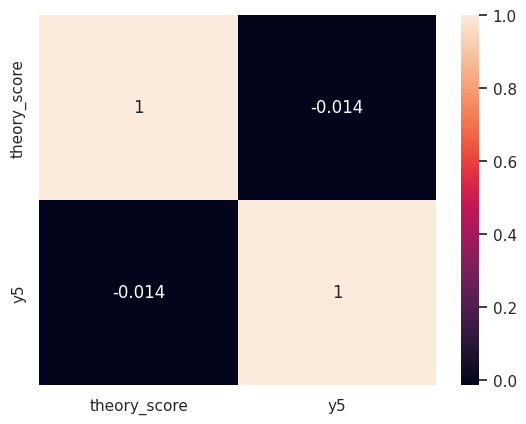

In [ ]:
def calc_corr(df, a, b):
    df = df[(df[a] < 100) & (df[b]) < 100]
    ans = df[[a, b]].corr()
    sns.heatmap(ans, annot=True)
    # print('corr with', a, 'and', b ,'is', ans)

calc_corr(df22, 'theory_score', 'l2_2')

<Axes: >

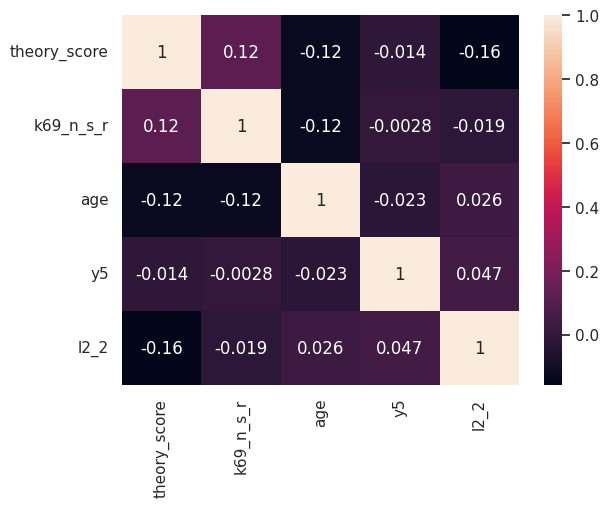

In [ ]:
sns.heatmap(df22[['theory_score', 'k69_n_s_r', 'age', 'y5', 'l2_2']].corr(), annot=True)

In [ ]:
a123 = a[a['income_person'] > 0]
b123 = b[b['income_person'] > 0]
q1_a = a123['income_person'].quantile(.25)
q3_a= a123['income_person'].quantile(.75)
q1_b = b123['income_person'].quantile(.25)
q3_b = b123['income_person'].quantile(.75)
iqr_a = q3_a - q1_a
iqr_b = q3_b - q1_b
lower_bound_a = q1_a - 1.5 * iqr_a
lower_bound_b = q1_b - 1.5 * iqr_b
upper_bound_a = q3_a + 1.5 * iqr_a
upper_bound_b = q3_b + 1.5 * iqr_b
a123_wo = a123[(a123['income_person'] > lower_bound_a) & (a123['income_person'] < upper_bound_a)]
b123_wo = b123[(b123['income_person'] > lower_bound_b) & (b123['income_person'] < upper_bound_b)]
print('mean:', a123_wo['income_person'].mean(), b123_wo['income_person'].mean())
print('median:', a123_wo['income_person'].median(), b123_wo['income_person'].median())
upper_bound_b

mean: 18154.113606310704 20596.79615393741
median: 16666.666666666668 19000.0


51333.33333333333

In [ ]:
print(len(df22), (df22['income_person'] > upper_bound_a).sum())
print(len(b), len(b123_wo))

4437 127
7004 5352


<ipython-input-31-e951c750e555>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-e951c750e555>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



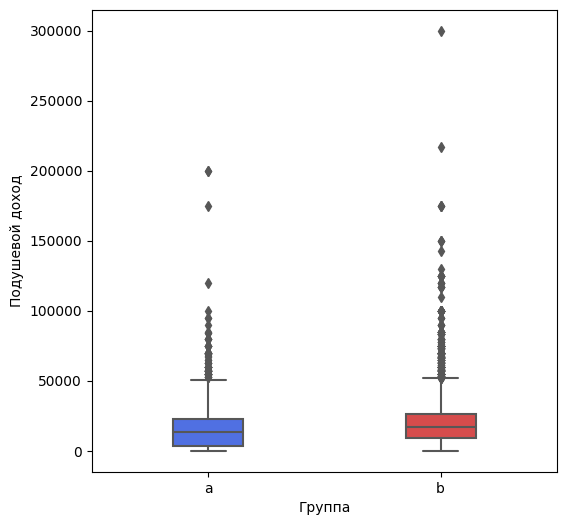

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))

a123_wo = a
b123_wo = b

a123_wo['Группа'] = 'a'
b123_wo['Группа'] = 'b'
ab123_wo = pd.concat([a123_wo, b123_wo])

sns.set(style="whitegrid")
sns_plot = sns.boxplot(data=ab123_wo, x='Группа', y='income_person', width=0.3, zorder=3, palette=['#3862FA', '#ED3535'])
fig = sns_plot.get_figure()
plt.ylabel('Подушевой доход')
fig.savefig(img_path + 'person_income_boxplot.png', bbox_inches='tight', transparent=True)
plt.show()

In [ ]:
print(stats.ttest_ind(a['income_person'], b['income_person'], equal_var=False))
print(stats.mannwhitneyu(a['income_person'], b['income_person'], alternative='two-sided'))

TtestResult(statistic=-8.228258027373279, pvalue=2.257950336399326e-16, df=6780.091548736141)
MannwhitneyuResult(statistic=7557691.0, pvalue=1.5511779087545593e-18)


<Axes: xlabel='age_bin'>

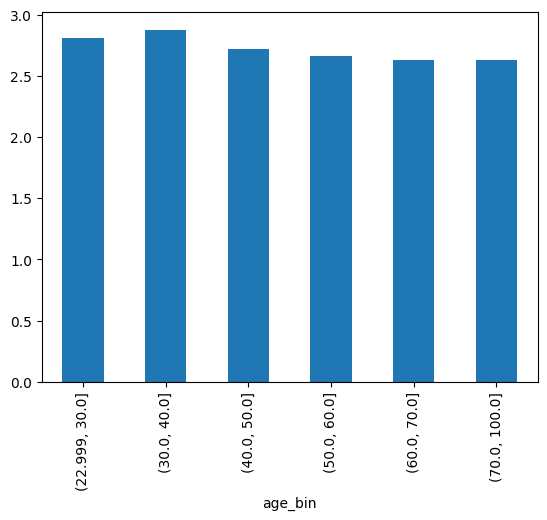

In [ ]:
df22['age_bin'] = pd.cut(df22['age'], bins=[df22['age'].min(), 30, 40, 50, 60, 70, 100], include_lowest=True)
df22.groupby(['age_bin'])['theory_score'].mean().plot.bar()

Text(0.5, 0, 'Оценка')

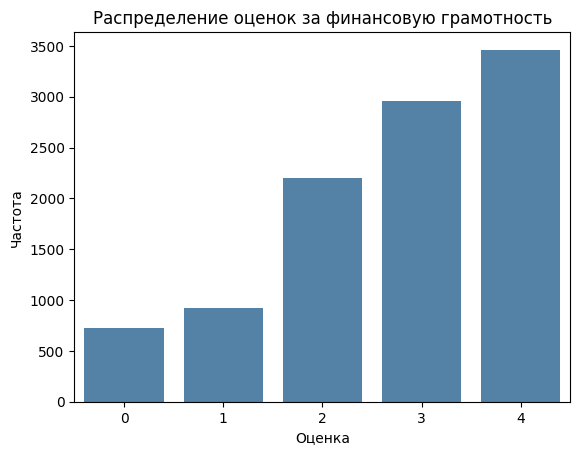

In [ ]:
data_for_bar22 = df22["theory_score"].value_counts().reset_index()
sns.barplot(data_for_bar22, x='index', y='theory_score', color='steelblue')
plt.title("Распределение оценок за финансовую грамотность")
plt.ylabel("Частота")
plt.xlabel("Оценка")

<ipython-input-130-d0adc895389f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.barplot(df22[df22["k68"] <= 21], x='k68', y='theory_score', order=df22[df['k68'] <= 21].groupby('k68')['theory_score'].mean().sort_values(ascending=False).index, color='steelblue')


<Axes: xlabel='k68', ylabel='theory_score'>

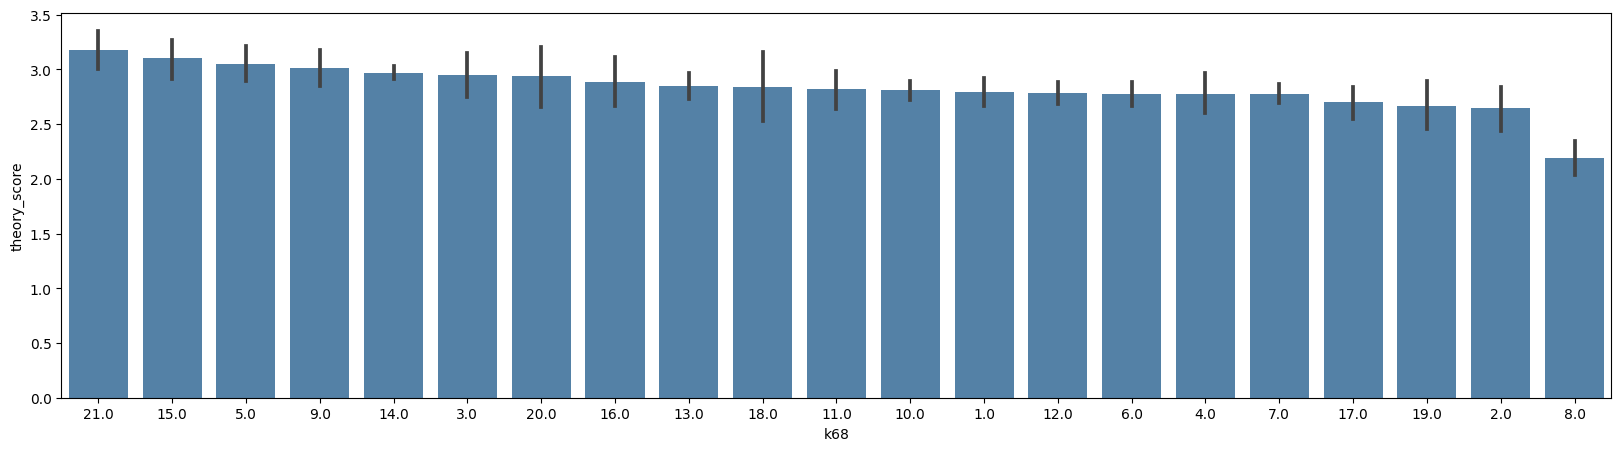

In [ ]:
plt.subplots(figsize=(20, 5))
sns.barplot(df22[df22["k68"] <= 21], x='k68', y='theory_score', order=df22[df['k68'] <= 21].groupby('k68')['theory_score'].mean().sort_values(ascending=False).index, color='steelblue')

In [ ]:
df33['income_bin'] = pd.cut(df33['k11_n_s_r'], bins=[df33['k11_n_s_r'].min(), 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 60000, 70000, df33['k11_n_s_r'].max()])

<Axes: xlabel='income_bin'>

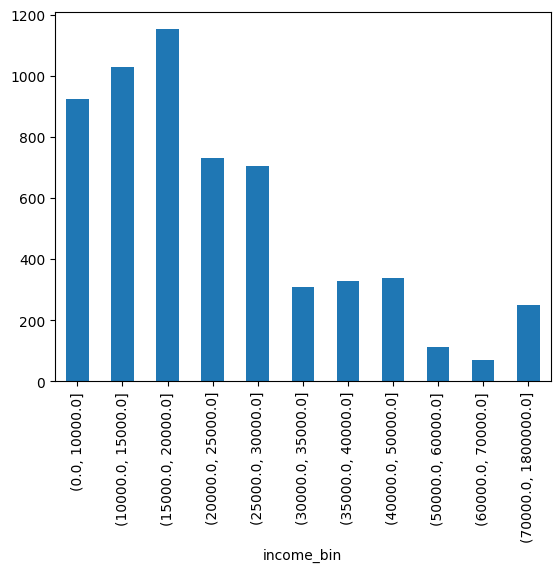

In [ ]:
df33.groupby('income_bin')['theory_score'].count().plot(kind='bar')

<Axes: title={'center': '2018 год скор финграмоты по прибыль'}, xlabel='income_bin'>

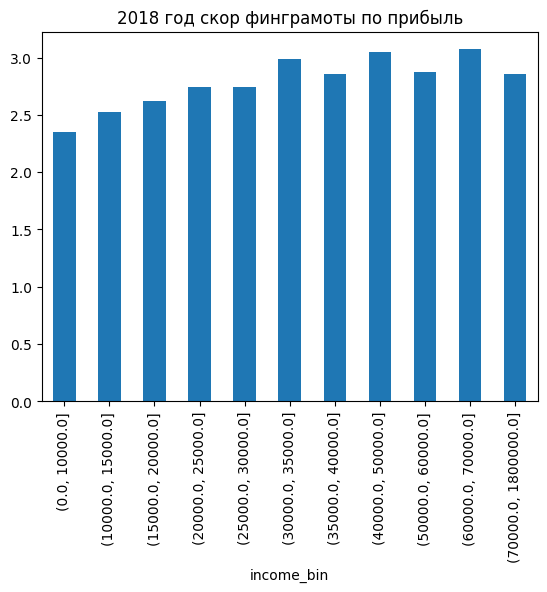

In [ ]:
df33.groupby('income_bin')['theory_score'].mean().plot(kind='bar', title='2018 год скор финграмоты по прибыль')

In [ ]:
df['income_bin'] = pd.cut(df['k69_n_s_r'], bins=[df['k69_n_s_r'].min(), 10000, 15000, 20000, 25000, 30000, 35000, 40000, 50000, 60000, 70000, df['k69_n_s_r'].max()])

In [ ]:
df.groupby('income_bin')['theory_score'].mean().plot(kind='bar', title='2022 год скор финграмоты по прибыль')

KeyError: ignored

In [ ]:
print(a['k69_n_s_r'].describe())
print(b['k69_n_s_r'].describe())

count      2198.000000
mean      31329.139217
std       22474.474344
min        1000.000000
25%       18000.000000
50%       25000.000000
75%       40000.000000
max      420000.000000
Name: k69_n_s_r, dtype: float64
count      4071.000000
mean      36440.370179
std       28804.539817
min          50.000000
25%       20000.000000
50%       30000.000000
75%       45000.000000
max      600000.000000
Name: k69_n_s_r, dtype: float64


In [ ]:
df22['age'].median

44.0

In [ ]:
border_1 = 44
border_2 = 45
aa = df22[df22['age'] <= border_1]
bb = df22[df22['age'] >= border_2]

In [ ]:
df1 = list(aa[aa['m19'] <= 100]['m19'].value_counts())
df2 = list(bb[bb['m19'] <= 100]['m19'].value_counts())
data_age = [df1, df2]
print(stats.chi2_contingency(data_age))

Chi2ContingencyResult(statistic=6.020457975907355, pvalue=0.014140976688039635, dof=1, expected_freq=array([[1615.20548702, 1211.79451298],
       [1487.79451298, 1116.20548702]]))


In [ ]:
border_1 = 27000
border_2 = 27001
aa = df22[df22['k69_n_s_r'] <= border_1]
bb = df22[df22['k69_n_s_r'] >= border_2]

In [ ]:
df1 = list(aa[aa['m19'] <= 100]['m19'].value_counts())
df2 = list(bb[bb['m19'] <= 100]['m19'].value_counts())
data_rich = [df1, df2]
print(stats.chi2_contingency(data_rich))

Chi2ContingencyResult(statistic=3.2594751988533286, pvalue=0.07101184965177967, dof=1, expected_freq=array([[1387.23697293, 1040.76302707],
       [1715.76302707, 1287.23697293]]))


<Axes: >

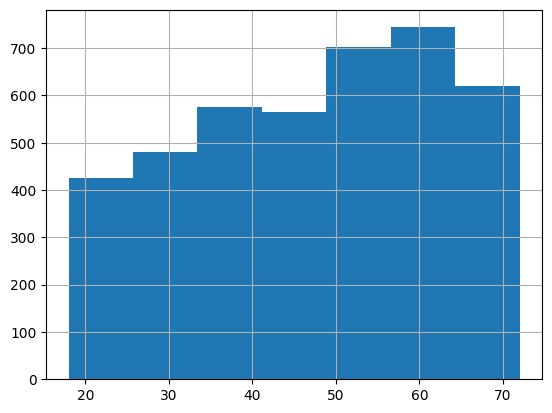

In [ ]:
a[a['age'] <= 101]['age'].hist(bins=7)

<Axes: >

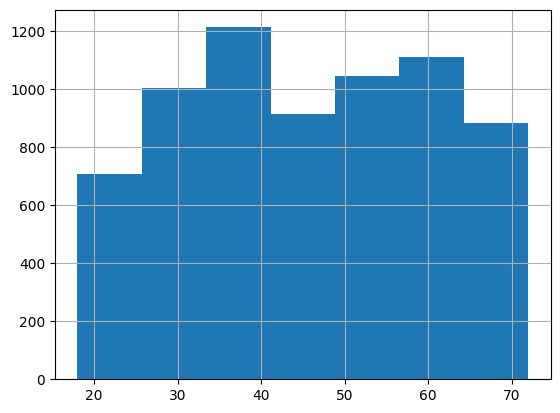

In [ ]:
b[b['age'] <= 101]['age'].hist(bins=7)

In [ ]:
a[a['age'] <= 101]['age'].mean(), b[b['age'] <= 101]['age'].mean()

(47.41887618584286, 45.67529822519639)

count    2148.000000
mean        3.405493
std         1.060318
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: l2_2, dtype: float64
count    4055.000000
mean        3.175339
std         1.087709
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: l2_2, dtype: float64


<Axes: >

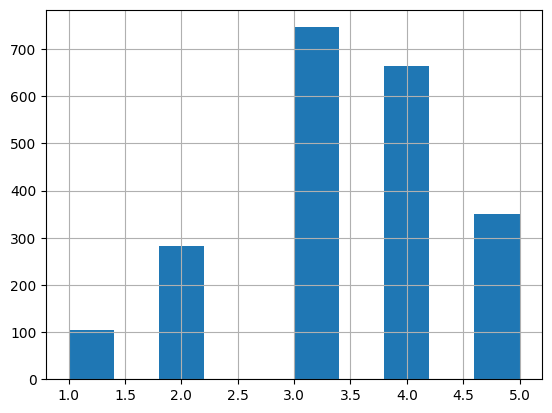

In [ ]:
print(a[a['l2_2'] < 100]['l2_2'].describe())
print(b[b['l2_2'] < 100]['l2_2'].describe())
a[a['l2_2'] < 100]['l2_2'].hist()

<Axes: >

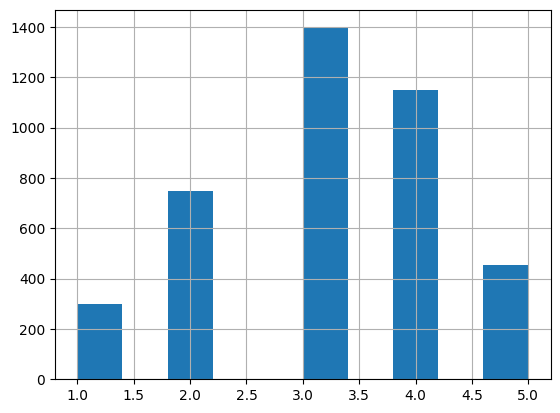

In [ ]:
b[b['l2_2'] < 100]['l2_2'].hist()

In [ ]:
df1 = list(a[a['l2_2'] <= 100]['l2_2'].value_counts())
df2 = list(b[b['l2_2'] <= 100]['l2_2'].value_counts())
data_month = [df1, df2]
print(stats.chi2_contingency(data_month))

Chi2ContingencyResult(statistic=24.982445067173046, pvalue=5.072035532200192e-05, dof=4, expected_freq=array([[ 742.77930034,  628.50556182,  380.91246171,  255.5576334 ,
         140.24504272],
       [1402.22069966, 1186.49443818,  719.08753829,  482.4423666 ,
         264.75495728]]))


In [ ]:
import scipy.stats as stats
print('a', a['age'].mean())
print('b', b['age'].mean())
print('c', c['age'].mean())
print('d', d['age'].mean())


a 49.30845253576073
b 48.19898037077426
c 48.33522458628842
d 47.03667479935794


In [ ]:
a['k69_n_s_r'].describe()

count      2586.000000
mean      30644.895205
std       21318.851636
min           0.000000
25%       17500.000000
50%       25000.000000
75%       40000.000000
max      420000.000000
Name: k69_n_s_r, dtype: float64

In [ ]:
print('a', a['k69_n_s_r'].mean())
print('b', b['k69_n_s_r'].mean())
print('c', c['k11_n_s_r'].mean())
print('d', d['k11_n_s_r'].mean())
print('a', a['k69_n_s_r'].median())
print('b', b['k69_n_s_r'].median())
print('c', c['k11_n_s_r'].median())
print('d', d['k11_n_s_r'].median())

a 32675.154089709766
b 33841.98581151832
c 28320.385205291972
d 28992.148260105445
a 25000.0
b 30000.0
c 20000.0
d 21000.0


<Axes: xlabel='theory_score2', ylabel='k89'>

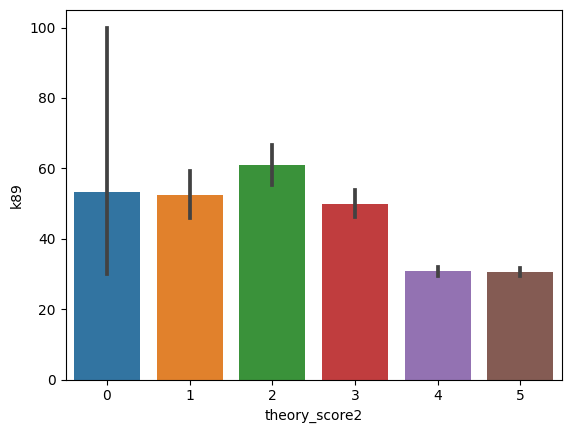

In [ ]:
sns.barplot(df333[df333.k89 <= 100000], x="theory_score2", y="k89")

## ПОДВАЛ

In [ ]:
age_split = [23, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 100]
age_split_label = ['<23', '30', '35', '40', '45', '50', '55', '60', '65', '70', '75', '80', '85', '>85']
df22['sex_color'] = df22['i_h4'].apply(lambda x: '#3862FA' if x == 1 else '#ED3535')
df22['age_bin'] = pd.cut(df22['age'], bins=[18] + age_split, labels=age_split_label, include_lowest=True)
age_bin_count = df22.groupby(['age_bin', 'sex_color'])['idind'].count()

In [ ]:
fig = px.bar(age_bin_count.to_frame().reset_index(), x='age_bin', y='idind', color='sex_color', width=900, height=600,
             #title='Распределение ответов по возрастам',
                )
fig.update_traces(width=0.6)
fig.data[-2].name = '' # Мужской
fig.data[-1].name = '' # Женский
fig.update_layout(
    xaxis_title='', # Возрастная группа
    yaxis_title='', # Количество ответов
    legend_title='', # Пол
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки

    # font_family="Courier-New",
)
fig.show()

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
a['Группа'] = 'А'
b['Группа'] = 'Б'
a['Группа_цвет'] = '#3862FA'
b['Группа_цвет'] = '#ED3535'
ab = pd.concat([a, b])
fig = px.box(ab, x="Группа", y="income_person", color='Группа')
fig.update_layout(boxgap=0.25,
                  boxgroupgap=0.4,
                  width=600, height=800,
                  xaxis_title='',
                  yaxis_title='',
                  legend_title=' ',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  yaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки
                  )
fig.show()

<ipython-input-111-746a731c39df>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-746a731c39df>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-746a731c39df>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-111-746

In [ ]:
a['Группа'] = 'А'
b['Группа'] = 'Б'
a['Группа_цвет'] = '#3862FA'
b['Группа_цвет'] = '#ED3535'
ab = pd.concat([a, b])
fig = px.box(ab, x="Группа", y="income_person", color='Группа')
fig.update_layout(boxgap=0.25,
                  boxgroupgap=0.4,
                  width=600, height=800,
                  xaxis_title='',
                  yaxis_title='',
                  legend_title=' ',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  yaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки
                  )
fig.show()

<ipython-input-17-12a3312ed9fc>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-12a3312ed9fc>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-12a3312ed9fc>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-17-12a3312

In [ ]:
size_split = [0, 1, 2, 3, 4, 5, df_hh_22['d1'].max()]
size_split_label = ['1', '2', '3', '4', '5', '6+']
df_hh_22['size_bin'] = pd.cut(df_hh_22['d1'], bins=size_split, labels=size_split_label, include_lowest=True)
size_bin_count = df_hh_22.groupby(['size_bin'])['d1'].count()
size_bin_count

<ipython-input-129-2bb1611f2615>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



size_bin
1     1488
2     1995
3     1241
4      842
5      333
6+     182
Name: d1, dtype: int64

In [ ]:
fig = px.bar(size_bin_count.to_frame().reset_index(), x='size_bin', y='d1', width=900, height=600,
             #title='Распределение ответов по возрастам',
                )
fig.update_traces(width=0.6)
# fig.data[-2].name = '' # Мужской
# fig.data[-1].name = '' # Женскийф
fig.update_traces(marker_color='#3862FA')
fig.update_layout(
    xaxis_title='', # Возрастная группа
    yaxis_title='', # Количество ответов
    legend_title='', # Пол
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки

    # font_family="Courier-New",
)
fig.show()

In [ ]:
theory_count = df33.groupby('theory_score')['idind'].count()
theory_count

theory_score
0     639
1     853
2    1868
3    2533
4    2771
Name: idind, dtype: int64

In [ ]:
fig = px.bar(theory_count.to_frame().reset_index(), x='theory_score', y='idind', width=900, height=600,
             #title='Распределение ответов по возрастам',
                )
fig.update_traces(width=0.6)
# fig.data[-2].name = '' # Мужской
# fig.data[-1].name = '' # Женскийф
fig.update_traces(marker_color='#3862FA')
fig.update_layout(
    xaxis_title=' ', # Возрастная группа
    yaxis_title=' ', # Количество ответов
    legend_title=' ', # Пол
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки

    # font_family="Courier-New",
)
fig.show()

In [ ]:
# theory_count = pd.DataFrame(theory_count.to_frame().reset_index())
theory_count['score_color'] = theory_count['theory_score'].apply(lambda x: '#3862FA' if x <=2 else '#ED3535')

In [ ]:
fig = px.bar(theory_count, x='theory_score', y='idind', color='score_color', width=900, height=600,
             #title='Распределение ответов по возрастам',
                )
fig.update_traces(width=0.6)
fig.data[-2].name = ' ' # Мужской
fig.data[-1].name = ' ' # Женскийф
# fig.update_traces(marker_color='#3862FA')
fig.update_layout(
    xaxis_title=' ', # Возрастная группа
    yaxis_title=' ', # Количество ответов
    legend_title=' ', # Пол
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки

    # font_family="Courier-New",
)
fig.show()

In [ ]:
theory_count = df33.groupby('theory_score')['idind'].count()
theory_count = pd.DataFrame(theory_count.to_frame().reset_index())
theory_count['score_color'] = theory_count['theory_score'].apply(lambda x: '#3862FA' if x <=2 else '#ED3535')

In [ ]:
fig = px.bar(theory_count, x='theory_score', y='idind', color='score_color', width=900, height=600,
             #title='Распределение ответов по возрастам',
                )
fig.update_traces(width=0.6)
fig.data[-2].name = ' ' # Мужской
fig.data[-1].name = ' ' # Женскийф
# fig.update_traces(marker_color='#3862FA')
fig.update_layout(
    xaxis_title=' ', # Возрастная группа
    yaxis_title=' ', # Количество ответов
    legend_title=' ', # Пол
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки

    # font_family="Courier-New",
)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['B  ', 'A  '],
    x=[0.6, 0.54],
    name=' ',
    orientation='h',
    marker=dict(
        color='#ED3535',
        # line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=['B  ', 'A  '],
    x=[0.4, 0.46],
    name=' ',
    orientation='h',
    marker=dict(
        color='#3862FA',
        # line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',
                  width=800, height=400,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  xaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки
)
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['B  ', 'A  '],
    x=[0.62, 0.61],
    name=' ',
    orientation='h',
    marker=dict(
        color='#ED3535',
        # line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=['B  ', 'A  '],
    x=[0.38, 0.39],
    name=' ',
    orientation='h',
    marker=dict(
        color='#3862FA',
        # line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',
                  width=800, height=400,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  xaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки
)
fig.show()

In [ ]:
t7_ans = df22.t7.apply(lambda x: int(x == 1.0)).mean()
t11_ans = df22.t11.apply(lambda x: int(x == 1.0)).mean()
t17_ans = df22.t17.apply(lambda x: int(x == 3.0)).mean()
t27_ans = df22.t27.apply(lambda x: int(x == 2.0)).mean()
t33_ans = df22.t33.apply(lambda x: int(x == 2.0)).mean()
l2 = np.array([t27_ans, t11_ans, t7_ans, t17_ans, t33_ans])
l1 = np.array(['t27', 't11', 't7', 't17', 't33'])
l3 = 1 - l2
l2

array([0.99526173, 0.83280686, 0.75056408, 0.59792419, 0.5724278 ])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=l1,
    x=l2,
    name=' ',
    orientation='h',
    marker=dict(
        color='#ED3535',
        # line=dict(color='rgba(246, 78, 139, 1.0)', width=3)
    )
))
fig.add_trace(go.Bar(
    y=l1,
    x=l3,
    name=' ',
    orientation='h',
    marker=dict(
        color='#3862FA',
        # line=dict(color='rgba(58, 71, 80, 1.0)', width=3)
    )
))

fig.update_layout(barmode='stack',
                  width=900, height=450,
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  xaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки
)
fig.show()

In [ ]:
theory_count = df22[df22['y5'] < 100].groupby('y5')['theory_score'].mean()
theory_count

y5
1    2.123786
2    2.548291
3    2.272000
4    2.599537
5    2.682967
6    2.729469
7    3.085075
8    3.066667
9    3.400000
Name: theory_score, dtype: float64

In [ ]:
fig = px.bar(theory_count.to_frame().reset_index(), x='y5', y='theory_score', width=900, height=600,
             #title='Распределение ответов по возрастам',
                )
fig.update_traces(width=0.6)
# fig.data[-2].name = '' # Мужской
# fig.data[-1].name = '' # Женскийф
fig.update_traces(marker_color='#3862FA')
fig.update_layout(
    xaxis_title=' ', # Возрастная группа
    yaxis_title=' ', # Количество ответов
    legend_title=' ', # Пол
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='#CACACA', # Это цвет сетки

    # font_family="Courier-New",
)
fig.show()

In [ ]:
def calc_my_size(x):
    if (x <= 3): # мск + спб + миллионники
        return 'Города-миллионники'
    if (x <= 7): # города
        return 'Остальные города'
    return 'Села' # иначе села

df22['moy_size'] = df22['size'].apply(calc_my_size)

In [ ]:
theory_size = df22.groupby('moy_size')['theory_score'].mean().sort_values(ascending=False)

In [ ]:
fig = px.bar(theory_size.to_frame().reset_index(), x='moy_size', y='theory_score', width=900, height=600,
             #title='Распределение ответов по возрастам',
                )
fig.update_traces(width=0.6)
# fig.data[-2].name = ' ' # Мужской
# fig.data[-1].name = ' ' # Женскийф
fig.update_traces(marker_color='#3862FA')
fig.update_layout(
    xaxis_title=' ', # Возрастная группа
    yaxis_title=' ', # Количество ответов
    legend_title=' ', # Пол
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='#CACACA', # Это цвет сетки

    # font_family="Courier-New",
)
fig.show()

,k68,theory_score
0,21.0,3.183673
1,15.0,3.102941
2,5.0,3.053763
3,9.0,3.017341
4,14.0,2.968953
5,3.0,2.953488
6,20.0,2.940299
7,16.0,2.852941
8,13.0,2.850318
9,18.0,2.843750


In [ ]:
theory_work = df22[df22['k68'] <= 21].groupby('k68')['theory_score'].mean().sort_values(ascending=False)
theory_work = theory_work.to_frame().reset_index()
theory_work['k68'] = theory_work['k68'].apply(lambda x: str(int(x)))
fig = px.bar(theory_work, x='k68', y='theory_score', width=900, height=600,
             #title='Распределение ответов по возрастам',
                )
fig.update_traces(width=0.6)
# fig.data[-2].name = ' ' # Мужской
# fig.data[-1].name = ' ' # Женскийф
fig.update_traces(marker_color='#3862FA')
fig.update_layout(
    xaxis_title=' ', # Возрастная группа
    yaxis_title=' ', # Количество ответов
    legend_title=' ', # Пол
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    yaxis_gridcolor='#CACACA', # Это цвет сетки

    # font_family="Courier-New",
)
fig.show()

In [ ]:
df22['Группа'] = 'Доход'
fig = px.box(df22[(df22['k69_n_s_r'] > 0) & (df22['k69_n_s_r'] < 1600000)], x="Группа", y="k69_n_s_r")
fig.update_layout(boxgap=0.25,
                  boxgroupgap=0.4,
                  width=500, height=800,
                  xaxis_title='',
                  yaxis_title='',
                  legend_title=' ',
                  paper_bgcolor='rgba(0,0,0,0)',
                  plot_bgcolor='rgba(0,0,0,0)',
                  yaxis_gridcolor='rgba(0,0,0,0)', # Это цвет сетки
                  )
fig.show()